# Pencil Sketch with Python

In [14]:


import cv2

image = cv2.imread("C:/Users/jacks/Downloads/ideogram.jpeg")
image=cv2.resize(image,(500,500),interpolation=cv2.INTER_LINEAR)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


inverted_image = 255 - gray_image


blurred = cv2.GaussianBlur(inverted_image, (21, 21), 0)

inverted_blurred = 255 - blurred
pencil_sketch = cv2.divide(gray_image, inverted_blurred, scale=256.0)
image2=cv2.resize(pencil_sketch,(500,500),interpolation=cv2.INTER_LINEAR)

cv2.imshow("original image", image)
cv2.imshow("Pencil Sketch",image2)
cv2.waitKey(0)

-1

In [1]:
import cv2
import numpy as np

# Load the two images: the source image (to extract the face) and the destination image (to replace the face)
source_image = cv2.imread("C:/Users/jacks/Desktop/Face Swap Flask App/sample_data/image1.png")
destination_image = cv2.imread("C:/Users/jacks/Desktop/Face Swap Flask App/sample_data/image2.png")

# Load a pre-trained face detection model (e.g., Haar Cascade)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in both images
source_faces = face_cascade.detectMultiScale(source_image, scaleFactor=1.1, minNeighbors=5)
destination_faces = face_cascade.detectMultiScale(destination_image, scaleFactor=1.1, minNeighbors=5)

# Assuming one face is detected in each image, extract the faces
if len(source_faces) > 0 and len(destination_faces) > 0:
    x, y, w, h = source_faces[0]
    source_face = source_image[y:y+h, x:x+w]

    x, y, w, h = destination_faces[0]
    destination_face = destination_image[y:y+h, x:x+w]

    # Resize the source face to match the size of the destination face
    source_face = cv2.resize(source_face, (w, h))

    # Swap the faces
    destination_image[y:y+h, x:x+w] = source_face

    # Save the swapped image
    cv2.imwrite("output_image.jpg", destination_image)

    # Display the result
    cv2.imshow("Face Swap", destination_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("No faces found in one or both images.")


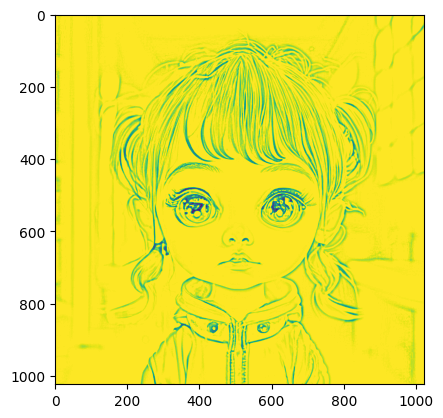